<a href="https://colab.research.google.com/github/aborbala/tree-canopy/blob/main/03_01a_Model_training_default_ultarlitics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!pip install ultralytics==8.3.111

In [17]:
!pip install geopandas shapely opencv-python tqdm rasterio

import os
import random
import shutil
import json
import geopandas as gpd
import cv2
import numpy as np
from tqdm import tqdm
from shapely.geometry import Polygon
from ultralytics import YOLO
import datetime
import pandas as pd
import rasterio

In [27]:
# no_build_all_crowns
label_dir = "/content/drive/MyDrive/masterthesis/data/386_5818/yolo_dataset/labels/train"
data_yaml = "/content/drive/MyDrive/masterthesis/data/386_5818/yolo_dataset/dataset.yaml"

train_params = {
    "data": data_yaml,
    "epochs": 200,
    "batch": 16,
    "optimizer": "AdamW",
    "lr0": 1e-4,
    "mosaic": False,
    "mixup": 0.0,
    # "rect": True,
    # "classes": [1], # if class 0 should be background
    "name": "no_build_all_crowns",
    "patience": 50,
    "project": "/content/drive/MyDrive/masterthesis/data/runs",
    "single_cls": True, # handles all classes as one
    "exist_ok": True,
    "overlap_mask": True,
}

In [28]:
# Get list of annotation files
label_files = [f for f in os.listdir(label_dir) if f.endswith(".txt")]

# Print first few annotation files
for label_file in label_files[:5]:  # Check first 5 files
    with open(os.path.join(label_dir, label_file), "r") as f:
        print(f"📄 {label_file} content:")
        print(f.read(), "\n")

📄 3dm_33_387_5819_1_be_nobuild_166.txt content:
0 0.992750 0.245500 0.991375 0.238000 0.985375 0.221500 0.984000 0.223000 0.977625 0.170000 0.976125 0.156000 0.977500 0.153500 0.976625 0.133500 0.978000 0.127500 0.977250 0.106500 0.979375 0.095500 0.979750 0.083000 0.979750 0.075000 0.979250 0.072000 0.981125 0.066000 0.981750 0.065000 0.981625 0.051500 0.981375 0.050500 0.982250 0.043000 0.983000 0.038500 0.982125 0.026500 0.982750 0.010500 0.983375 0.001500 0.983439 0.000000 1.000000 0.000000 1.000000 0.253261 0.992750 0.245500 0.992750 0.245500
0 0.691750 0.124000 0.696875 0.124500 0.710375 0.174500 0.713625 0.163500 0.717375 0.150500 0.718875 0.151000 0.720125 0.149500 0.723250 0.153500 0.724500 0.151000 0.727250 0.150500 0.730750 0.153500 0.730750 0.155000 0.730500 0.160000 0.730750 0.178500 0.730125 0.179000 0.730875 0.190000 0.730750 0.200000 0.730500 0.200500 0.730875 0.204500 0.731500 0.209500 0.730250 0.225000 0.730625 0.233500 0.731500 0.235500 0.744125 0.263500 0.745750 0.2

In [29]:
model = YOLO("yolo11m-seg.pt")  # Use segmentation model

# Train with updated params
results = model.train(**train_params)

New https://pypi.org/project/ultralytics/8.3.151 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.111 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11m-seg.pt, data=/content/drive/MyDrive/masterthesis/data/386_5818/yolo_dataset/dataset.yaml, epochs=200, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/masterthesis/data/runs, name=no_build_all_crowns, exist_ok=True, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False,

train: Scanning /content/drive/MyDrive/masterthesis/data/386_5818/yolo_dataset/labels/train.cache... 534 images, 6 backgrounds, 0 corrupt: 100%|██████████| 540/540 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 3.9±5.1 ms, read: 36.4±24.6 MB/s, size: 412.9 KB)


val: Scanning /content/drive/MyDrive/masterthesis/data/386_5818/yolo_dataset/labels/val.cache... 135 images, 1 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/masterthesis/data/runs/no_build_all_crowns/labels.jpg... 
optimizer: AdamW(lr=0.0001, momentum=0.937) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/masterthesis/data/runs/no_build_all_crowns
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200      10.1G      2.447      4.573      2.604      2.233        157        640: 100%|██████████| 34/34 [00:26<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        136       2284     0.0646       0.22     0.0436     0.0134          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      9.95G      2.198      3.957      2.125      2.001        180        640: 100%|██████████| 34/34 [00:26<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        136       2284      0.341      0.278      0.239     0.0779     0.0169      0.042    0.00583    0.00174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200      9.92G      2.172       3.88      2.022      1.941        160        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all        136       2284      0.442       0.33      0.312       0.11      0.281      0.187      0.128     0.0323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      9.89G      2.137      3.835      2.025      1.937        202        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        136       2284      0.487      0.349      0.343      0.122      0.452      0.291      0.271      0.076



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200        10G      2.131      3.794      1.967      1.908        183        640: 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        136       2284      0.505      0.337      0.351      0.131      0.469      0.284      0.284     0.0874



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      9.88G      2.105      3.746      1.961      1.897        164        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        136       2284      0.534      0.368      0.373      0.139      0.488       0.31      0.301     0.0927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200      9.82G      2.086       3.72      1.919      1.901        195        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        136       2284      0.542      0.382      0.381      0.139       0.48      0.327      0.306     0.0921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200        10G      2.091      3.719      1.889       1.89        188        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        136       2284      0.517      0.371      0.373      0.139      0.463      0.314      0.302     0.0944



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      9.75G      2.058      3.663      1.856      1.873        167        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        136       2284      0.556      0.381       0.39      0.147      0.533      0.346      0.347      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      9.96G      2.051      3.669      1.813      1.856        223        640: 100%|██████████| 34/34 [00:26<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        136       2284       0.53      0.398      0.394      0.152      0.491      0.323       0.31     0.0978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      9.88G      2.014      3.608      1.804      1.843        217        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        136       2284      0.553      0.399      0.395      0.149      0.532      0.337      0.332      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      9.96G          2      3.602      1.775       1.82        171        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        136       2284      0.517      0.392       0.38      0.132      0.443      0.295       0.28     0.0792



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      9.83G      2.018      3.577      1.751      1.817        186        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        136       2284      0.543      0.393       0.39      0.147       0.46      0.316      0.296     0.0931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      9.97G      1.982      3.542      1.727      1.795        130        640: 100%|██████████| 34/34 [00:26<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        136       2284      0.587      0.404       0.42      0.165       0.54      0.363      0.365      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      9.89G      1.961      3.542      1.697      1.773        200        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        136       2284      0.591      0.424      0.428      0.164      0.542      0.381      0.368      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      9.89G      1.971      3.522       1.66      1.761        252        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        136       2284       0.55      0.405       0.41      0.161      0.533      0.365      0.358       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200      9.87G      1.938      3.491      1.663      1.781        172        640: 100%|██████████| 34/34 [00:25<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        136       2284      0.566      0.401      0.418      0.171      0.539      0.352       0.36      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      9.87G      1.906       3.48       1.59      1.724        215        640: 100%|██████████| 34/34 [00:26<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        136       2284      0.567      0.421      0.408      0.155      0.527      0.373      0.353      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      9.99G      1.955      3.485        1.6      1.747        167        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        136       2284      0.592      0.427      0.422      0.164      0.543      0.374      0.356      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      9.88G      1.903      3.423      1.581      1.732        182        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        136       2284      0.587      0.432      0.428      0.168      0.549      0.392      0.376      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200      9.87G       1.89      3.404      1.543      1.698        142        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        136       2284      0.564      0.436      0.431      0.167      0.543      0.395      0.384       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      10.1G      1.894      3.417      1.538      1.732        180        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        136       2284      0.573      0.426       0.42      0.163      0.554      0.382      0.374       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      9.88G      1.883      3.411       1.52      1.701        116        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        136       2284      0.583      0.423      0.431      0.166      0.548      0.389      0.377       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      9.89G      1.849      3.353      1.509      1.709        206        640: 100%|██████████| 34/34 [00:26<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        136       2284      0.558      0.412      0.407      0.152      0.528      0.372      0.353      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      9.77G      1.839      3.319      1.459      1.674        189        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        136       2284      0.517      0.415      0.393      0.148      0.499      0.371      0.343       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      9.95G      1.826      3.308       1.42      1.667        171        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        136       2284      0.542       0.44      0.409      0.153      0.536      0.378      0.354      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      9.88G      1.803      3.284      1.393      1.653        163        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        136       2284      0.545      0.418      0.405      0.148      0.498      0.367      0.337      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200        10G      1.796       3.28      1.386      1.629        184        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        136       2284      0.581       0.41      0.414      0.158      0.556      0.376      0.369      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      9.83G      1.787      3.262      1.336      1.624        182        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        136       2284      0.586      0.408      0.418      0.164       0.55      0.379      0.375      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200        10G      1.768      3.229      1.346      1.613        141        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        136       2284      0.585      0.415      0.423       0.16      0.556      0.367      0.361       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      9.85G      1.781      3.216      1.333      1.609        203        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        136       2284      0.582      0.438      0.427       0.16       0.54      0.405      0.379      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      9.91G      1.765      3.221      1.313      1.608        201        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        136       2284      0.603      0.414      0.424      0.161       0.56      0.381      0.371      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      9.97G      1.743      3.217      1.302      1.605        163        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        136       2284       0.55      0.431      0.413      0.153      0.507      0.385      0.356      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200      9.87G      1.729      3.175      1.276      1.603        166        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        136       2284      0.543      0.413      0.411      0.153       0.51      0.373      0.351      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200        10G      1.709      3.144      1.228      1.567        153        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        136       2284      0.568      0.438      0.426      0.163      0.545      0.397      0.377      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200        10G      1.679      3.127        1.2      1.547        173        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        136       2284       0.55      0.424      0.412      0.149      0.515      0.377      0.354      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200      9.93G      1.688      3.138      1.195      1.547        187        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        136       2284      0.542      0.444       0.42      0.154      0.519       0.39      0.367      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200       9.9G      1.667      3.092      1.174       1.53        210        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        136       2284      0.552      0.435      0.419      0.152      0.533      0.377      0.367      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      9.93G      1.665      3.084      1.146      1.528        168        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        136       2284      0.575      0.426      0.415      0.153      0.526      0.371      0.352      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200      9.86G      1.657      3.095      1.165      1.522        175        640: 100%|██████████| 34/34 [00:26<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        136       2284       0.55      0.445      0.413       0.16      0.527      0.405      0.373      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200       9.7G      1.631       3.04      1.135      1.521        159        640: 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        136       2284      0.502      0.405      0.372      0.128      0.468      0.362      0.319     0.0951
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 21, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



41 epochs completed in 0.350 hours.
Optimizer stripped from /content/drive/MyDrive/masterthesis/data/runs/no_build_all_crowns/weights/last.pt, 45.2MB
Optimizer stripped from /content/drive/MyDrive/masterthesis/data/runs/no_build_all_crowns/weights/best.pt, 45.2MB

Validating /content/drive/MyDrive/masterthesis/data/runs/no_build_all_crowns/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-seg summary (fused): 138 layers, 22,336,083 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:03,  1.26it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.04it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]


                   all        136       2284      0.563      0.435      0.431      0.167      0.543      0.394      0.384       0.13
Speed: 0.3ms preprocess, 14.3ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /content/drive/MyDrive/masterthesis/data/runs/no_build_all_crowns


### Inference

In [30]:
# Load trained model
#model = YOLO("runs/segment/train2/weights/best.pt")  # Update path if needed

# Define the test image path
test_image_path = "/content/drive/MyDrive/masterthesis/data/test/382_5826_9_8.tif"

# Run inference
results = model(test_image_path, save=True, imgsz=640, conf=0.1)

# Get the prediction masks
predicted_masks = results[0].masks  # Get segmentation masks
predicted_boxes = results[0].boxes  # Get bounding boxes


image 1/1 /content/drive/MyDrive/masterthesis/data/test/382_5826_9_8.tif: 640x640 29 items, 30.5ms
Speed: 2.8ms preprocess, 30.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/masterthesis/data/runs/no_build_all_crowns


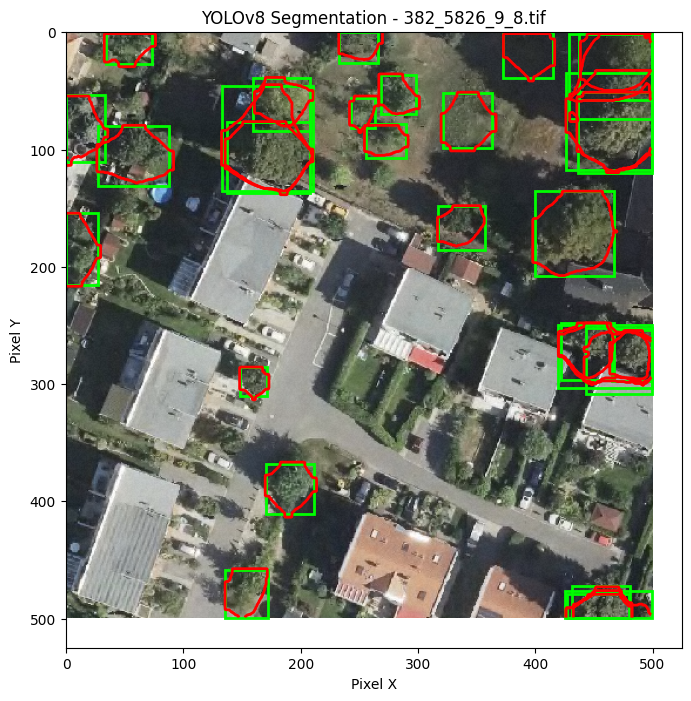

In [31]:
# Function to plot results
import matplotlib.pyplot as plt

def plot_prediction(image_path, results):
    with rasterio.open(image_path) as src:
        image = src.read([1, 2, 3])  # Read as RGB (first three bands)
        image = np.moveaxis(image, 0, -1)  # Convert from (C, H, W) to (H, W, C)

        height, width, _ = image.shape

        fig, ax = plt.subplots(figsize=(8, 8))
        ax.imshow(image)  # Show RGB image

        # Plot segmentation masks (Red)
        if results[0].masks is not None:
            for mask in results[0].masks.data:
                mask = mask.cpu().numpy()

                if mask.ndim == 3:  # Some models return (C, H, W) format, take the first channel
                    mask = mask[0]

                mask_resized = cv2.resize(mask, (width, height))  # Resize to match image size
                ax.contour(mask_resized, levels=[0.5], colors='red', linewidths=2)

        # Plot bounding boxes (Green)
        if results[0].boxes is not None:
            for box in results[0].boxes:
                x_min, y_min, x_max, y_max = box.xyxy[0].cpu().numpy()
                ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                           edgecolor="lime", facecolor="none", linewidth=2))

        ax.set_xlabel("Pixel X")
        ax.set_ylabel("Pixel Y")
        ax.set_title(f"YOLOv8 Segmentation - {os.path.basename(image_path)}")
        plt.show()

# Plot results
plot_prediction(test_image_path, results)

In [32]:
results_dir = "/content/drive/MyDrive/masterthesis/data/386_5818/training_results"
os.makedirs(results_dir, exist_ok=True)

# Run validation to extract final metrics
val_results = model.val()
if hasattr(val_results, "results_dict"):
    val_metrics = val_results.results_dict
else:
    val_metrics = {}

# Prepare log data with training parameters and final validation metrics
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
log_data = {
    "train_params": train_params,
    "final_validation_metrics": val_metrics,
}

# ✅ Save final results to JSON
output_json = os.path.join(results_dir, f"results_{timestamp}.json")
with open(output_json, "w") as f:
    json.dump(log_data, f, indent=4)

# 📊 Flatten the log data for CSV saving (each key is prefixed to indicate its source)
flattened_data = {f"train_{k}": v for k, v in train_params.items()}
flattened_data.update({f"val_{k}": v for k, v in val_metrics.items()})
df = pd.DataFrame([flattened_data])

# ✅ Save final results to CSV
output_csv = os.path.join(results_dir, f"results_{timestamp}.csv")
df.to_csv(output_csv, index=False)

print(f"✅ Final training results saved to {output_json} and {output_csv}")

Ultralytics 8.3.111 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 3.1±5.6 ms, read: 137.4±116.8 MB/s, size: 471.5 KB)


val: Scanning /content/drive/MyDrive/masterthesis/data/386_5818/yolo_dataset/labels/val.cache... 135 images, 1 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/9 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  11%|█         | 1/9 [00:01<00:11,  1.48s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  22%|██▏       | 2/9 [00:02<00:08,  1.22s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


                   all        136       2284      0.562      0.439      0.431      0.167      0.539      0.396      0.382       0.13
Speed: 1.6ms preprocess, 30.6ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/drive/MyDrive/masterthesis/data/runs/no_build_all_crowns
✅ Final training results saved to /content/drive/MyDrive/masterthesis/data/386_5818/training_results/results_20250606_121739.json and /content/drive/MyDrive/masterthesis/data/386_5818/training_results/results_20250606_121739.csv
